In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston

In [88]:
boston=load_boston()

In [91]:
boston_data=pd.DataFrame(boston.data,columns=boston.feature_names)
boston_data['MEDV']=boston.target

In [92]:
boston_data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

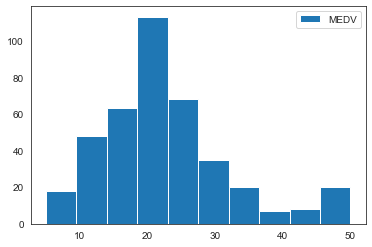

In [5]:
sns.set_style('white')
plt.hist(boston_data['MEDV'],label='MEDV')
plt.legend()
plt.show()

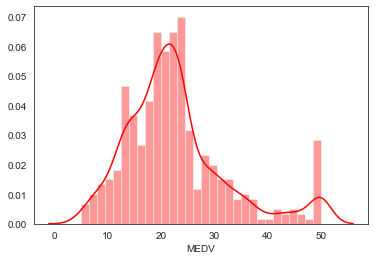

In [6]:
sns.distplot(boston_data['MEDV'],bins=30,color='red')

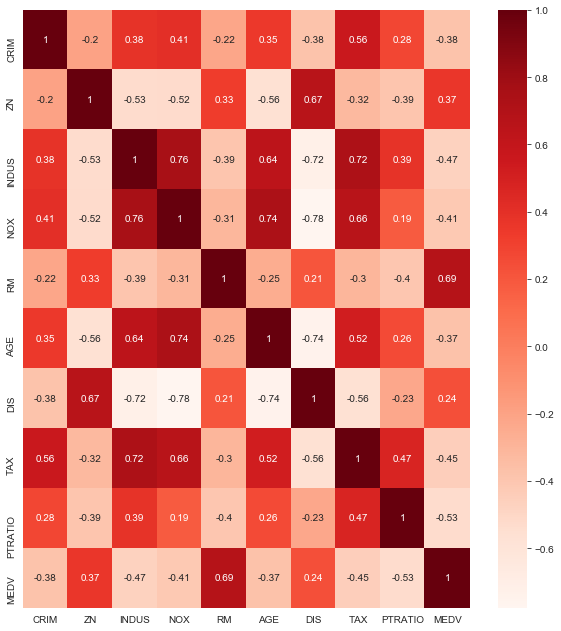

In [7]:
plt.figure(figsize=(10,11)) 
sns.heatmap(boston_data.corr(),annot=True,cmap='Reds')

In [93]:
boston_df.drop('CHAS',axis=1,inplace=True) 

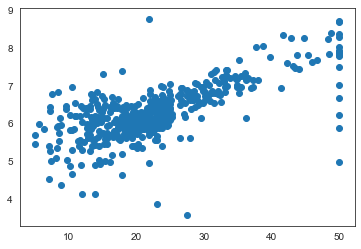

In [94]:
plt.scatter(boston_data['MEDV'],boston_data['RM'])

In [95]:
X=boston_data.drop('MEDV',axis=1)

In [96]:
y=boston_data['MEDV']

In [97]:
from sklearn.preprocessing import MinMaxScaler

In [98]:
scaler=MinMaxScaler(feature_range=(0,1))

In [99]:
scaled_data=scaler.fit_transform(X)

In [100]:
from sklearn.model_selection import train_test_split

In [131]:
X_train, X_test, y_train, y_test=train_test_split(scaled_data,y,test_size=0.2,random_state=2)
X_train.shape

(404, 13)

In [132]:
from keras.layers import Dense
import tensorflow as tf
import keras
from keras import Sequential

In [133]:
def build_model():
    model=Sequential([
        Dense(units=150,activation=tf.nn.relu, input_shape=[len(X.keys())]), # First layer
        Dense(120,activation=tf.nn.relu), # Hidden layer
        Dense(70,activation=tf.nn.relu),
    Dense(1)   # Ouput layer
    ])
    optimizer=keras.optimizers.RMSprop(0.0001)
    model.compile(loss='mean_squared_error',optimizer=optimizer,metrics=['mean_absolute_error','mean_squared_error'])
    return model

In [134]:
model=build_model()

In [135]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 150)               2100      
_________________________________________________________________
dense_38 (Dense)             (None, 120)               18120     
_________________________________________________________________
dense_39 (Dense)             (None, 70)                8470      
_________________________________________________________________
dense_40 (Dense)             (None, 1)                 71        
Total params: 28,761
Trainable params: 28,761
Non-trainable params: 0
_________________________________________________________________


In [136]:
history=model.fit(X_train,y_train,epochs=1000,batch_size=20,validation_split=0.15)


Train on 343 samples, validate on 61 samples
Epoch 1/1000
343/343 [==============================] - 0s 421us/step - loss: 576.0234 - mean_absolute_error: 22.0568 - mean_squared_error: 576.0234 - val_loss: 508.4120 - val_mean_absolute_error: 21.1927 - val_mean_squared_error: 508.4120
Epoch 2/1000
343/343 [==============================] - 0s 67us/step - loss: 559.7569 - mean_absolute_error: 21.6732 - mean_squared_error: 559.7569 - val_loss: 493.3119 - val_mean_absolute_error: 20.8230 - val_mean_squared_error: 493.3119
Epoch 3/1000
343/343 [==============================] - 0s 93us/step - loss: 542.0752 - mean_absolute_error: 21.2523 - mean_squared_error: 542.0751 - val_loss: 475.3732 - val_mean_absolute_error: 20.3739 - val_mean_squared_error: 475.3731
Epoch 4/1000
343/343 [==============================] - 0s 93us/step - loss: 521.9707 - mean_absolute_error: 20.7542 - mean_squared_error: 521.9708 - val_loss: 456.0740 - val_mean_absolute_error: 19.8784 - val_mean_squared_error: 456.074

343/343 [==============================] - 0s 70us/step - loss: 67.3164 - mean_absolute_error: 5.9201 - mean_squared_error: 67.3164 - val_loss: 43.1097 - val_mean_absolute_error: 4.6730 - val_mean_squared_error: 43.1097
Epoch 35/1000
343/343 [==============================] - 0s 70us/step - loss: 64.8475 - mean_absolute_error: 5.7533 - mean_squared_error: 64.8475 - val_loss: 41.4820 - val_mean_absolute_error: 4.6241 - val_mean_squared_error: 41.4820
Epoch 36/1000
343/343 [==============================] - 0s 70us/step - loss: 62.7613 - mean_absolute_error: 5.6667 - mean_squared_error: 62.7613 - val_loss: 40.0709 - val_mean_absolute_error: 4.4957 - val_mean_squared_error: 40.0709
Epoch 37/1000
343/343 [==============================] - 0s 93us/step - loss: 61.0553 - mean_absolute_error: 5.5410 - mean_squared_error: 61.0553 - val_loss: 38.9858 - val_mean_absolute_error: 4.4444 - val_mean_squared_error: 38.9858
Epoch 38/1000
343/343 [==============================] - 0s 93us/step - loss: 

343/343 [==============================] - 0s 93us/step - loss: 33.8038 - mean_absolute_error: 4.0392 - mean_squared_error: 33.8038 - val_loss: 20.6054 - val_mean_absolute_error: 3.4507 - val_mean_squared_error: 20.6054
Epoch 70/1000
343/343 [==============================] - 0s 93us/step - loss: 33.3242 - mean_absolute_error: 4.0339 - mean_squared_error: 33.3242 - val_loss: 20.1348 - val_mean_absolute_error: 3.3956 - val_mean_squared_error: 20.1348
Epoch 71/1000
343/343 [==============================] - 0s 70us/step - loss: 32.9364 - mean_absolute_error: 4.0155 - mean_squared_error: 32.9364 - val_loss: 19.5146 - val_mean_absolute_error: 3.3169 - val_mean_squared_error: 19.5146
Epoch 72/1000
343/343 [==============================] - 0s 70us/step - loss: 32.3960 - mean_absolute_error: 3.9756 - mean_squared_error: 32.3960 - val_loss: 19.0694 - val_mean_absolute_error: 3.2603 - val_mean_squared_error: 19.0694
Epoch 73/1000
343/343 [==============================] - 0s 93us/step - loss: 

343/343 [==============================] - 0s 93us/step - loss: 23.5400 - mean_absolute_error: 3.3282 - mean_squared_error: 23.5400 - val_loss: 13.1504 - val_mean_absolute_error: 2.6125 - val_mean_squared_error: 13.1504
Epoch 104/1000
343/343 [==============================] - 0s 70us/step - loss: 23.3163 - mean_absolute_error: 3.2807 - mean_squared_error: 23.3163 - val_loss: 13.3029 - val_mean_absolute_error: 2.6319 - val_mean_squared_error: 13.3029
Epoch 105/1000
343/343 [==============================] - 0s 70us/step - loss: 23.1971 - mean_absolute_error: 3.2840 - mean_squared_error: 23.1971 - val_loss: 12.7649 - val_mean_absolute_error: 2.5465 - val_mean_squared_error: 12.7649
Epoch 106/1000
343/343 [==============================] - 0s 70us/step - loss: 23.1859 - mean_absolute_error: 3.2552 - mean_squared_error: 23.1859 - val_loss: 12.7425 - val_mean_absolute_error: 2.5397 - val_mean_squared_error: 12.7425
Epoch 107/1000
343/343 [==============================] - 0s 93us/step - lo

Epoch 138/1000
343/343 [==============================] - 0s 70us/step - loss: 20.6084 - mean_absolute_error: 3.0696 - mean_squared_error: 20.6084 - val_loss: 12.3756 - val_mean_absolute_error: 2.6069 - val_mean_squared_error: 12.3756
Epoch 139/1000
343/343 [==============================] - 0s 93us/step - loss: 20.4419 - mean_absolute_error: 3.0404 - mean_squared_error: 20.4419 - val_loss: 12.3360 - val_mean_absolute_error: 2.6034 - val_mean_squared_error: 12.3360
Epoch 140/1000
343/343 [==============================] - 0s 93us/step - loss: 20.4899 - mean_absolute_error: 3.0389 - mean_squared_error: 20.4899 - val_loss: 12.2898 - val_mean_absolute_error: 2.6005 - val_mean_squared_error: 12.2898
Epoch 141/1000
343/343 [==============================] - 0s 70us/step - loss: 20.4070 - mean_absolute_error: 3.0500 - mean_squared_error: 20.4070 - val_loss: 11.8226 - val_mean_absolute_error: 2.4774 - val_mean_squared_error: 11.8226
Epoch 142/1000
343/343 [==============================] - 0s

Epoch 173/1000
343/343 [==============================] - 0s 70us/step - loss: 18.6934 - mean_absolute_error: 2.8569 - mean_squared_error: 18.6934 - val_loss: 12.8466 - val_mean_absolute_error: 2.7812 - val_mean_squared_error: 12.8466
Epoch 174/1000
343/343 [==============================] - 0s 70us/step - loss: 18.7013 - mean_absolute_error: 2.9041 - mean_squared_error: 18.7013 - val_loss: 11.9125 - val_mean_absolute_error: 2.6209 - val_mean_squared_error: 11.9125
Epoch 175/1000
343/343 [==============================] - 0s 93us/step - loss: 18.5954 - mean_absolute_error: 2.8665 - mean_squared_error: 18.5954 - val_loss: 11.4142 - val_mean_absolute_error: 2.4983 - val_mean_squared_error: 11.4142
Epoch 176/1000
343/343 [==============================] - 0s 93us/step - loss: 18.6470 - mean_absolute_error: 2.8513 - mean_squared_error: 18.6470 - val_loss: 11.9533 - val_mean_absolute_error: 2.6311 - val_mean_squared_error: 11.9533
Epoch 177/1000
343/343 [==============================] - 0s

Epoch 208/1000
343/343 [==============================] - 0s 70us/step - loss: 17.0760 - mean_absolute_error: 2.7283 - mean_squared_error: 17.0760 - val_loss: 11.5505 - val_mean_absolute_error: 2.6283 - val_mean_squared_error: 11.5505
Epoch 209/1000
343/343 [==============================] - 0s 70us/step - loss: 17.0502 - mean_absolute_error: 2.7330 - mean_squared_error: 17.0502 - val_loss: 11.1588 - val_mean_absolute_error: 2.5540 - val_mean_squared_error: 11.1588
Epoch 210/1000
343/343 [==============================] - 0s 70us/step - loss: 16.8643 - mean_absolute_error: 2.6880 - mean_squared_error: 16.8643 - val_loss: 11.3825 - val_mean_absolute_error: 2.5948 - val_mean_squared_error: 11.3825
Epoch 211/1000
343/343 [==============================] - 0s 93us/step - loss: 17.0325 - mean_absolute_error: 2.7046 - mean_squared_error: 17.0325 - val_loss: 11.3800 - val_mean_absolute_error: 2.5992 - val_mean_squared_error: 11.3800
Epoch 212/1000
343/343 [==============================] - 0s

Epoch 243/1000
343/343 [==============================] - 0s 70us/step - loss: 15.6081 - mean_absolute_error: 2.5899 - mean_squared_error: 15.6081 - val_loss: 11.0885 - val_mean_absolute_error: 2.5882 - val_mean_squared_error: 11.0885
Epoch 244/1000
343/343 [==============================] - 0s 70us/step - loss: 15.5997 - mean_absolute_error: 2.6369 - mean_squared_error: 15.5997 - val_loss: 10.9289 - val_mean_absolute_error: 2.5548 - val_mean_squared_error: 10.9289
Epoch 245/1000
343/343 [==============================] - 0s 93us/step - loss: 15.4518 - mean_absolute_error: 2.5611 - mean_squared_error: 15.4518 - val_loss: 12.3664 - val_mean_absolute_error: 2.7624 - val_mean_squared_error: 12.3664
Epoch 246/1000
343/343 [==============================] - 0s 93us/step - loss: 15.5559 - mean_absolute_error: 2.6076 - mean_squared_error: 15.5559 - val_loss: 10.8654 - val_mean_absolute_error: 2.5544 - val_mean_squared_error: 10.8654
Epoch 247/1000
343/343 [==============================] - ET

343/343 [==============================] - 0s 70us/step - loss: 14.4657 - mean_absolute_error: 2.5267 - mean_squared_error: 14.4657 - val_loss: 11.1760 - val_mean_absolute_error: 2.6303 - val_mean_squared_error: 11.1760
Epoch 278/1000
343/343 [==============================] - 0s 70us/step - loss: 14.4458 - mean_absolute_error: 2.4894 - mean_squared_error: 14.4458 - val_loss: 10.8331 - val_mean_absolute_error: 2.5794 - val_mean_squared_error: 10.8331
Epoch 279/1000
343/343 [==============================] - 0s 70us/step - loss: 14.5283 - mean_absolute_error: 2.4814 - mean_squared_error: 14.5283 - val_loss: 11.2261 - val_mean_absolute_error: 2.6318 - val_mean_squared_error: 11.2261
Epoch 280/1000
343/343 [==============================] - 0s 93us/step - loss: 14.4374 - mean_absolute_error: 2.4948 - mean_squared_error: 14.4374 - val_loss: 11.5378 - val_mean_absolute_error: 2.6637 - val_mean_squared_error: 11.5378
Epoch 281/1000
343/343 [==============================] - 0s 93us/step - lo

Epoch 312/1000
343/343 [==============================] - 0s 93us/step - loss: 13.5696 - mean_absolute_error: 2.4214 - mean_squared_error: 13.5696 - val_loss: 10.7433 - val_mean_absolute_error: 2.5791 - val_mean_squared_error: 10.7433
Epoch 313/1000
343/343 [==============================] - 0s 93us/step - loss: 13.4821 - mean_absolute_error: 2.4085 - mean_squared_error: 13.4821 - val_loss: 12.1164 - val_mean_absolute_error: 2.7502 - val_mean_squared_error: 12.1164
Epoch 314/1000
343/343 [==============================] - 0s 70us/step - loss: 13.4354 - mean_absolute_error: 2.4512 - mean_squared_error: 13.4354 - val_loss: 10.5641 - val_mean_absolute_error: 2.5621 - val_mean_squared_error: 10.5641
Epoch 315/1000
343/343 [==============================] - 0s 70us/step - loss: 13.4655 - mean_absolute_error: 2.4109 - mean_squared_error: 13.4655 - val_loss: 10.5566 - val_mean_absolute_error: 2.5628 - val_mean_squared_error: 10.5566
Epoch 316/1000
343/343 [==============================] - 0s

Epoch 347/1000
343/343 [==============================] - 0s 70us/step - loss: 12.6444 - mean_absolute_error: 2.3632 - mean_squared_error: 12.6444 - val_loss: 10.7495 - val_mean_absolute_error: 2.5949 - val_mean_squared_error: 10.7495
Epoch 348/1000
343/343 [==============================] - 0s 93us/step - loss: 12.5563 - mean_absolute_error: 2.3492 - mean_squared_error: 12.5563 - val_loss: 11.0548 - val_mean_absolute_error: 2.6276 - val_mean_squared_error: 11.0548
Epoch 349/1000
343/343 [==============================] - 0s 93us/step - loss: 12.5196 - mean_absolute_error: 2.3657 - mean_squared_error: 12.5196 - val_loss: 11.4866 - val_mean_absolute_error: 2.6765 - val_mean_squared_error: 11.4866
Epoch 350/1000
343/343 [==============================] - 0s 93us/step - loss: 12.4759 - mean_absolute_error: 2.3700 - mean_squared_error: 12.4759 - val_loss: 10.7441 - val_mean_absolute_error: 2.5897 - val_mean_squared_error: 10.7441
Epoch 351/1000
343/343 [==============================] - 0s

343/343 [==============================] - 0s 70us/step - loss: 11.7870 - mean_absolute_error: 2.3047 - mean_squared_error: 11.7870 - val_loss: 10.2569 - val_mean_absolute_error: 2.5252 - val_mean_squared_error: 10.2569
Epoch 382/1000
343/343 [==============================] - 0s 70us/step - loss: 11.7043 - mean_absolute_error: 2.2762 - mean_squared_error: 11.7043 - val_loss: 10.2881 - val_mean_absolute_error: 2.5323 - val_mean_squared_error: 10.2881
Epoch 383/1000
343/343 [==============================] - 0s 93us/step - loss: 11.7018 - mean_absolute_error: 2.2838 - mean_squared_error: 11.7018 - val_loss: 10.3689 - val_mean_absolute_error: 2.5453 - val_mean_squared_error: 10.3689
Epoch 384/1000
343/343 [==============================] - 0s 93us/step - loss: 11.8177 - mean_absolute_error: 2.3016 - mean_squared_error: 11.8177 - val_loss: 10.3521 - val_mean_absolute_error: 2.5366 - val_mean_squared_error: 10.3521
Epoch 385/1000
343/343 [==============================] - 0s 93us/step - lo

343/343 [==============================] - 0s 70us/step - loss: 11.0512 - mean_absolute_error: 2.2135 - mean_squared_error: 11.0512 - val_loss: 10.2534 - val_mean_absolute_error: 2.5391 - val_mean_squared_error: 10.2534
Epoch 416/1000
343/343 [==============================] - 0s 93us/step - loss: 10.9442 - mean_absolute_error: 2.2289 - mean_squared_error: 10.9442 - val_loss: 10.0215 - val_mean_absolute_error: 2.4980 - val_mean_squared_error: 10.0215
Epoch 417/1000
343/343 [==============================] - 0s 93us/step - loss: 10.9770 - mean_absolute_error: 2.2266 - mean_squared_error: 10.9770 - val_loss: 10.7048 - val_mean_absolute_error: 2.5857 - val_mean_squared_error: 10.7048
Epoch 418/1000
343/343 [==============================] - 0s 93us/step - loss: 10.9494 - mean_absolute_error: 2.2309 - mean_squared_error: 10.9494 - val_loss: 10.9052 - val_mean_absolute_error: 2.6074 - val_mean_squared_error: 10.9052
Epoch 419/1000
343/343 [==============================] - 0s 93us/step - lo

Epoch 450/1000
343/343 [==============================] - 0s 70us/step - loss: 10.5626 - mean_absolute_error: 2.2095 - mean_squared_error: 10.5626 - val_loss: 10.1823 - val_mean_absolute_error: 2.5139 - val_mean_squared_error: 10.1823
Epoch 451/1000
343/343 [==============================] - 0s 70us/step - loss: 10.4047 - mean_absolute_error: 2.1849 - mean_squared_error: 10.4047 - val_loss: 10.2306 - val_mean_absolute_error: 2.5248 - val_mean_squared_error: 10.2306
Epoch 452/1000
343/343 [==============================] - 0s 93us/step - loss: 10.3620 - mean_absolute_error: 2.1681 - mean_squared_error: 10.3620 - val_loss: 9.9185 - val_mean_absolute_error: 2.4865 - val_mean_squared_error: 9.9185
Epoch 453/1000
343/343 [==============================] - 0s 70us/step - loss: 10.4683 - mean_absolute_error: 2.1850 - mean_squared_error: 10.4683 - val_loss: 9.8708 - val_mean_absolute_error: 2.4734 - val_mean_squared_error: 9.8708
Epoch 454/1000
343/343 [==============================] - 0s 93u

343/343 [==============================] - 0s 93us/step - loss: 9.8409 - mean_absolute_error: 2.1069 - mean_squared_error: 9.8409 - val_loss: 10.0556 - val_mean_absolute_error: 2.5109 - val_mean_squared_error: 10.0556
Epoch 486/1000
343/343 [==============================] - 0s 93us/step - loss: 9.8008 - mean_absolute_error: 2.1348 - mean_squared_error: 9.8008 - val_loss: 9.6294 - val_mean_absolute_error: 2.4634 - val_mean_squared_error: 9.6294
Epoch 487/1000
343/343 [==============================] - 0s 93us/step - loss: 9.9135 - mean_absolute_error: 2.1182 - mean_squared_error: 9.9135 - val_loss: 9.5539 - val_mean_absolute_error: 2.4465 - val_mean_squared_error: 9.5539
Epoch 488/1000
343/343 [==============================] - 0s 93us/step - loss: 9.8146 - mean_absolute_error: 2.1220 - mean_squared_error: 9.8146 - val_loss: 9.5696 - val_mean_absolute_error: 2.4513 - val_mean_squared_error: 9.5696
Epoch 489/1000
343/343 [==============================] - 0s 70us/step - loss: 9.8226 - m

343/343 [==============================] - 0s 70us/step - loss: 9.4262 - mean_absolute_error: 2.0914 - mean_squared_error: 9.4262 - val_loss: 9.5890 - val_mean_absolute_error: 2.4563 - val_mean_squared_error: 9.5890
Epoch 521/1000
343/343 [==============================] - 0s 70us/step - loss: 9.4490 - mean_absolute_error: 2.1006 - mean_squared_error: 9.4490 - val_loss: 9.7074 - val_mean_absolute_error: 2.4706 - val_mean_squared_error: 9.7074
Epoch 522/1000
343/343 [==============================] - 0s 93us/step - loss: 9.3637 - mean_absolute_error: 2.0797 - mean_squared_error: 9.3637 - val_loss: 10.9777 - val_mean_absolute_error: 2.6250 - val_mean_squared_error: 10.9777
Epoch 523/1000
343/343 [==============================] - 0s 93us/step - loss: 9.5164 - mean_absolute_error: 2.0921 - mean_squared_error: 9.5164 - val_loss: 9.8295 - val_mean_absolute_error: 2.4842 - val_mean_squared_error: 9.8295
Epoch 524/1000
343/343 [==============================] - 0s 93us/step - loss: 9.3112 - m

343/343 [==============================] - 0s 70us/step - loss: 9.1135 - mean_absolute_error: 2.0538 - mean_squared_error: 9.1135 - val_loss: 10.4231 - val_mean_absolute_error: 2.5540 - val_mean_squared_error: 10.4231
Epoch 556/1000
343/343 [==============================] - 0s 70us/step - loss: 8.8893 - mean_absolute_error: 2.0456 - mean_squared_error: 8.8893 - val_loss: 9.5173 - val_mean_absolute_error: 2.4568 - val_mean_squared_error: 9.5173
Epoch 557/1000
343/343 [==============================] - 0s 93us/step - loss: 8.8659 - mean_absolute_error: 2.0363 - mean_squared_error: 8.8659 - val_loss: 9.1898 - val_mean_absolute_error: 2.4207 - val_mean_squared_error: 9.1898
Epoch 558/1000
343/343 [==============================] - 0s 93us/step - loss: 8.9989 - mean_absolute_error: 2.0462 - mean_squared_error: 8.9989 - val_loss: 9.2272 - val_mean_absolute_error: 2.4270 - val_mean_squared_error: 9.2272
Epoch 559/1000
343/343 [==============================] - 0s 93us/step - loss: 9.0017 - m

343/343 [==============================] - 0s 93us/step - loss: 8.7583 - mean_absolute_error: 2.0274 - mean_squared_error: 8.7583 - val_loss: 9.8284 - val_mean_absolute_error: 2.4824 - val_mean_squared_error: 9.8284
Epoch 591/1000
343/343 [==============================] - 0s 93us/step - loss: 8.6077 - mean_absolute_error: 2.0079 - mean_squared_error: 8.6077 - val_loss: 9.2014 - val_mean_absolute_error: 2.4184 - val_mean_squared_error: 9.2014
Epoch 592/1000
343/343 [==============================] - 0s 70us/step - loss: 8.4617 - mean_absolute_error: 2.0065 - mean_squared_error: 8.4617 - val_loss: 9.0389 - val_mean_absolute_error: 2.3976 - val_mean_squared_error: 9.0389
Epoch 593/1000
343/343 [==============================] - 0s 70us/step - loss: 8.4588 - mean_absolute_error: 2.0057 - mean_squared_error: 8.4588 - val_loss: 8.9806 - val_mean_absolute_error: 2.3905 - val_mean_squared_error: 8.9806
Epoch 594/1000
343/343 [==============================] - 0s 93us/step - loss: 8.5594 - mea

Epoch 625/1000
343/343 [==============================] - 0s 70us/step - loss: 8.1710 - mean_absolute_error: 1.9569 - mean_squared_error: 8.1710 - val_loss: 8.9835 - val_mean_absolute_error: 2.3664 - val_mean_squared_error: 8.9835
Epoch 626/1000
343/343 [==============================] - 0s 70us/step - loss: 8.1249 - mean_absolute_error: 1.9412 - mean_squared_error: 8.1249 - val_loss: 9.2258 - val_mean_absolute_error: 2.3997 - val_mean_squared_error: 9.2258
Epoch 627/1000
343/343 [==============================] - 0s 93us/step - loss: 8.3225 - mean_absolute_error: 1.9701 - mean_squared_error: 8.3225 - val_loss: 9.2763 - val_mean_absolute_error: 2.4014 - val_mean_squared_error: 9.2763
Epoch 628/1000
343/343 [==============================] - 0s 93us/step - loss: 8.1283 - mean_absolute_error: 1.9592 - mean_squared_error: 8.1283 - val_loss: 9.2827 - val_mean_absolute_error: 2.4125 - val_mean_squared_error: 9.2827
Epoch 629/1000
343/343 [==============================] - 0s 70us/step - los

343/343 [==============================] - 0s 93us/step - loss: 7.7904 - mean_absolute_error: 1.9211 - mean_squared_error: 7.7904 - val_loss: 8.7989 - val_mean_absolute_error: 2.3441 - val_mean_squared_error: 8.7989
Epoch 661/1000
343/343 [==============================] - 0s 70us/step - loss: 7.8818 - mean_absolute_error: 1.9410 - mean_squared_error: 7.8818 - val_loss: 8.7270 - val_mean_absolute_error: 2.3330 - val_mean_squared_error: 8.7270
Epoch 662/1000
343/343 [==============================] - 0s 70us/step - loss: 7.9048 - mean_absolute_error: 1.9425 - mean_squared_error: 7.9048 - val_loss: 8.6781 - val_mean_absolute_error: 2.3359 - val_mean_squared_error: 8.6781
Epoch 663/1000
343/343 [==============================] - 0s 93us/step - loss: 7.9052 - mean_absolute_error: 1.9381 - mean_squared_error: 7.9052 - val_loss: 8.6597 - val_mean_absolute_error: 2.3375 - val_mean_squared_error: 8.6597
Epoch 664/1000
343/343 [==============================] - 0s 93us/step - loss: 7.7219 - mea

343/343 [==============================] - 0s 70us/step - loss: 7.5661 - mean_absolute_error: 1.9045 - mean_squared_error: 7.5661 - val_loss: 8.4941 - val_mean_absolute_error: 2.3066 - val_mean_squared_error: 8.4941
Epoch 695/1000
343/343 [==============================] - 0s 70us/step - loss: 7.4521 - mean_absolute_error: 1.8973 - mean_squared_error: 7.4521 - val_loss: 8.4661 - val_mean_absolute_error: 2.2941 - val_mean_squared_error: 8.4661
Epoch 696/1000
343/343 [==============================] - 0s 93us/step - loss: 7.5455 - mean_absolute_error: 1.8899 - mean_squared_error: 7.5455 - val_loss: 9.1139 - val_mean_absolute_error: 2.3727 - val_mean_squared_error: 9.1139
Epoch 697/1000
343/343 [==============================] - 0s 93us/step - loss: 7.4709 - mean_absolute_error: 1.8942 - mean_squared_error: 7.4709 - val_loss: 8.5682 - val_mean_absolute_error: 2.2953 - val_mean_squared_error: 8.5682
Epoch 698/1000
343/343 [==============================] - 0s 93us/step - loss: 7.6625 - mea

343/343 [==============================] - 0s 93us/step - loss: 7.3365 - mean_absolute_error: 1.8695 - mean_squared_error: 7.3365 - val_loss: 8.2820 - val_mean_absolute_error: 2.2636 - val_mean_squared_error: 8.2820
Epoch 730/1000
343/343 [==============================] - 0s 93us/step - loss: 7.2771 - mean_absolute_error: 1.8504 - mean_squared_error: 7.2771 - val_loss: 8.1543 - val_mean_absolute_error: 2.2442 - val_mean_squared_error: 8.1543
Epoch 731/1000
343/343 [==============================] - 0s 93us/step - loss: 7.3702 - mean_absolute_error: 1.8668 - mean_squared_error: 7.3702 - val_loss: 8.4128 - val_mean_absolute_error: 2.2611 - val_mean_squared_error: 8.4127
Epoch 732/1000
343/343 [==============================] - 0s 70us/step - loss: 7.1676 - mean_absolute_error: 1.8626 - mean_squared_error: 7.1676 - val_loss: 8.3226 - val_mean_absolute_error: 2.2555 - val_mean_squared_error: 8.3226
Epoch 733/1000
343/343 [==============================] - 0s 70us/step - loss: 7.2087 - mea

343/343 [==============================] - 0s 93us/step - loss: 6.9453 - mean_absolute_error: 1.8153 - mean_squared_error: 6.9453 - val_loss: 8.5407 - val_mean_absolute_error: 2.2629 - val_mean_squared_error: 8.5407
Epoch 765/1000
343/343 [==============================] - 0s 93us/step - loss: 6.9259 - mean_absolute_error: 1.8147 - mean_squared_error: 6.9259 - val_loss: 8.8234 - val_mean_absolute_error: 2.2981 - val_mean_squared_error: 8.8234
Epoch 766/1000
343/343 [==============================] - 0s 93us/step - loss: 7.0036 - mean_absolute_error: 1.8329 - mean_squared_error: 7.0036 - val_loss: 8.7679 - val_mean_absolute_error: 2.2894 - val_mean_squared_error: 8.7679
Epoch 767/1000
343/343 [==============================] - 0s 93us/step - loss: 6.9359 - mean_absolute_error: 1.8242 - mean_squared_error: 6.9359 - val_loss: 8.4777 - val_mean_absolute_error: 2.2606 - val_mean_squared_error: 8.4777
Epoch 768/1000
343/343 [==============================] - 0s 70us/step - loss: 6.9654 - mea

343/343 [==============================] - 0s 93us/step - loss: 6.7142 - mean_absolute_error: 1.8018 - mean_squared_error: 6.7142 - val_loss: 8.8127 - val_mean_absolute_error: 2.3030 - val_mean_squared_error: 8.8127
Epoch 800/1000
343/343 [==============================] - 0s 93us/step - loss: 6.7151 - mean_absolute_error: 1.7983 - mean_squared_error: 6.7151 - val_loss: 8.2710 - val_mean_absolute_error: 2.2507 - val_mean_squared_error: 8.2710
Epoch 801/1000
343/343 [==============================] - 0s 70us/step - loss: 6.6908 - mean_absolute_error: 1.7924 - mean_squared_error: 6.6908 - val_loss: 9.2904 - val_mean_absolute_error: 2.3703 - val_mean_squared_error: 9.2904
Epoch 802/1000
343/343 [==============================] - 0s 70us/step - loss: 6.6175 - mean_absolute_error: 1.8117 - mean_squared_error: 6.6175 - val_loss: 8.4565 - val_mean_absolute_error: 2.2530 - val_mean_squared_error: 8.4565
Epoch 803/1000
343/343 [==============================] - 0s 70us/step - loss: 6.6663 - mea

343/343 [==============================] - 0s 93us/step - loss: 6.5055 - mean_absolute_error: 1.7754 - mean_squared_error: 6.5055 - val_loss: 8.1441 - val_mean_absolute_error: 2.2129 - val_mean_squared_error: 8.1441
Epoch 835/1000
343/343 [==============================] - 0s 70us/step - loss: 6.4407 - mean_absolute_error: 1.7616 - mean_squared_error: 6.4407 - val_loss: 8.3238 - val_mean_absolute_error: 2.2462 - val_mean_squared_error: 8.3238
Epoch 836/1000
343/343 [==============================] - 0s 70us/step - loss: 6.3692 - mean_absolute_error: 1.7461 - mean_squared_error: 6.3692 - val_loss: 8.9165 - val_mean_absolute_error: 2.3019 - val_mean_squared_error: 8.9165
Epoch 837/1000
343/343 [==============================] - 0s 70us/step - loss: 6.4091 - mean_absolute_error: 1.7570 - mean_squared_error: 6.4091 - val_loss: 8.1649 - val_mean_absolute_error: 2.2163 - val_mean_squared_error: 8.1649
Epoch 838/1000
343/343 [==============================] - 0s 93us/step - loss: 6.3799 - mea

343/343 [==============================] - 0s 93us/step - loss: 6.0992 - mean_absolute_error: 1.7106 - mean_squared_error: 6.0992 - val_loss: 8.1988 - val_mean_absolute_error: 2.2041 - val_mean_squared_error: 8.1988
Epoch 870/1000
343/343 [==============================] - 0s 93us/step - loss: 6.1538 - mean_absolute_error: 1.7454 - mean_squared_error: 6.1538 - val_loss: 8.0177 - val_mean_absolute_error: 2.1889 - val_mean_squared_error: 8.0177
Epoch 871/1000
343/343 [==============================] - 0s 93us/step - loss: 6.0914 - mean_absolute_error: 1.7271 - mean_squared_error: 6.0914 - val_loss: 8.1552 - val_mean_absolute_error: 2.2013 - val_mean_squared_error: 8.1552
Epoch 872/1000
343/343 [==============================] - 0s 70us/step - loss: 6.1353 - mean_absolute_error: 1.7303 - mean_squared_error: 6.1353 - val_loss: 8.0658 - val_mean_absolute_error: 2.1965 - val_mean_squared_error: 8.0658
Epoch 873/1000
343/343 [==============================] - 0s 70us/step - loss: 6.1237 - mea

343/343 [==============================] - 0s 93us/step - loss: 5.8846 - mean_absolute_error: 1.6910 - mean_squared_error: 5.8846 - val_loss: 8.0717 - val_mean_absolute_error: 2.1829 - val_mean_squared_error: 8.0717
Epoch 905/1000
343/343 [==============================] - 0s 93us/step - loss: 5.9219 - mean_absolute_error: 1.6907 - mean_squared_error: 5.9219 - val_loss: 8.6970 - val_mean_absolute_error: 2.2619 - val_mean_squared_error: 8.6970
Epoch 906/1000
343/343 [==============================] - 0s 70us/step - loss: 5.8578 - mean_absolute_error: 1.7014 - mean_squared_error: 5.8578 - val_loss: 8.8801 - val_mean_absolute_error: 2.2846 - val_mean_squared_error: 8.8801
Epoch 907/1000
343/343 [==============================] - 0s 70us/step - loss: 5.8004 - mean_absolute_error: 1.6650 - mean_squared_error: 5.8004 - val_loss: 8.2284 - val_mean_absolute_error: 2.2122 - val_mean_squared_error: 8.2284
Epoch 908/1000
343/343 [==============================] - 0s 70us/step - loss: 5.9186 - mea

343/343 [==============================] - 0s 93us/step - loss: 5.6989 - mean_absolute_error: 1.6638 - mean_squared_error: 5.6989 - val_loss: 8.1348 - val_mean_absolute_error: 2.1746 - val_mean_squared_error: 8.1348
Epoch 940/1000
343/343 [==============================] - 0s 93us/step - loss: 5.5965 - mean_absolute_error: 1.6502 - mean_squared_error: 5.5965 - val_loss: 8.2067 - val_mean_absolute_error: 2.2075 - val_mean_squared_error: 8.2067
Epoch 941/1000
343/343 [==============================] - 0s 93us/step - loss: 5.6673 - mean_absolute_error: 1.6669 - mean_squared_error: 5.6673 - val_loss: 8.1430 - val_mean_absolute_error: 2.1766 - val_mean_squared_error: 8.1430
Epoch 942/1000
343/343 [==============================] - 0s 70us/step - loss: 5.5071 - mean_absolute_error: 1.6380 - mean_squared_error: 5.5071 - val_loss: 8.8629 - val_mean_absolute_error: 2.2685 - val_mean_squared_error: 8.8629
Epoch 943/1000
343/343 [==============================] - 0s 70us/step - loss: 5.5965 - mea

343/343 [==============================] - 0s 93us/step - loss: 5.3413 - mean_absolute_error: 1.6217 - mean_squared_error: 5.3413 - val_loss: 7.9350 - val_mean_absolute_error: 2.1517 - val_mean_squared_error: 7.9350
Epoch 975/1000
343/343 [==============================] - 0s 93us/step - loss: 5.3708 - mean_absolute_error: 1.6208 - mean_squared_error: 5.3708 - val_loss: 8.9331 - val_mean_absolute_error: 2.2708 - val_mean_squared_error: 8.9331
Epoch 976/1000
343/343 [==============================] - 0s 93us/step - loss: 5.3880 - mean_absolute_error: 1.6354 - mean_squared_error: 5.3880 - val_loss: 7.8368 - val_mean_absolute_error: 2.1335 - val_mean_squared_error: 7.8368
Epoch 977/1000
343/343 [==============================] - 0s 70us/step - loss: 5.2974 - mean_absolute_error: 1.6062 - mean_squared_error: 5.2974 - val_loss: 8.8303 - val_mean_absolute_error: 2.2550 - val_mean_squared_error: 8.8303
Epoch 978/1000
343/343 [==============================] - 0s 93us/step - loss: 5.3760 - mea

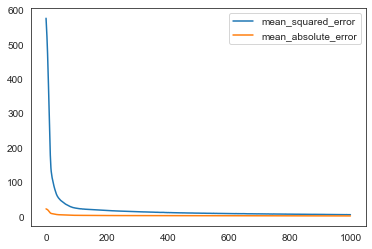

In [137]:
pd.DataFrame(history.history)[['mean_squared_error','mean_absolute_error']].plot()

In [138]:
pd.DataFrame(history.history)[['mean_squared_error','mean_absolute_error']][-1:]

,mean_squared_error,mean_absolute_error
999,5.19101,1.602318


In [139]:
pred=model.predict(X_test)

In [140]:
from sklearn.metrics import r2_score

In [141]:
r2_score(y_test,pred)

0.930885402226697